In [267]:
import numpy as np #para processamento numérico em Python
import matplotlib.pyplot as plt #para os gráficos
import geopandas as gpd #para a leitura de shapefiles
import seaborn as sns #para fazer o mapa de kernel
from matplotlib.patches import Ellipse #para projetar a elipse 
import contextily
import pandas as pd

# pointpats --> análise espacial de pontos
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs
from pointpats.distance_statistics import G, F, K, Genv, Fenv, Kenv
from pointpats import PoissonPointProcess

# Municípios do Mato Grosso do Sul

In [268]:
ms = gpd.read_file('data/MS/ms.shp')

In [269]:
ms

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,140,5000203,ÁGUA CLARA,"POLYGON ((-53.09300 -20.21272, -53.08960 -20.2..."
1,141,5000252,ALCINÓPOLIS,"POLYGON ((-53.50659 -18.40831, -53.50794 -18.4..."
2,142,5000609,AMAMBAI,"POLYGON ((-54.92462 -22.92414, -54.92290 -22.9..."
3,143,5000708,ANASTÁCIO,"POLYGON ((-55.41798 -20.86286, -55.41794 -20.8..."
4,144,5000807,ANAURILÂNDIA,"POLYGON ((-52.73613 -21.85311, -52.70559 -21.8..."
5,145,5000856,ANGÉLICA,"POLYGON ((-53.99320 -22.11721, -53.99956 -22.1..."
6,146,5000906,ANTÔNIO JOÃO,"POLYGON ((-56.21743 -22.17356, -56.21736 -22.1..."
7,147,5001003,APARECIDA DO TABOADO,"POLYGON ((-51.11639 -19.82113, -51.11518 -19.8..."
8,148,5001102,AQUIDAUANA,"POLYGON ((-55.97111 -19.46523, -55.96244 -19.4..."
9,149,5001243,ARAL MOREIRA,"POLYGON ((-55.51958 -22.72906, -55.52060 -22.7..."


In [270]:
ms.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

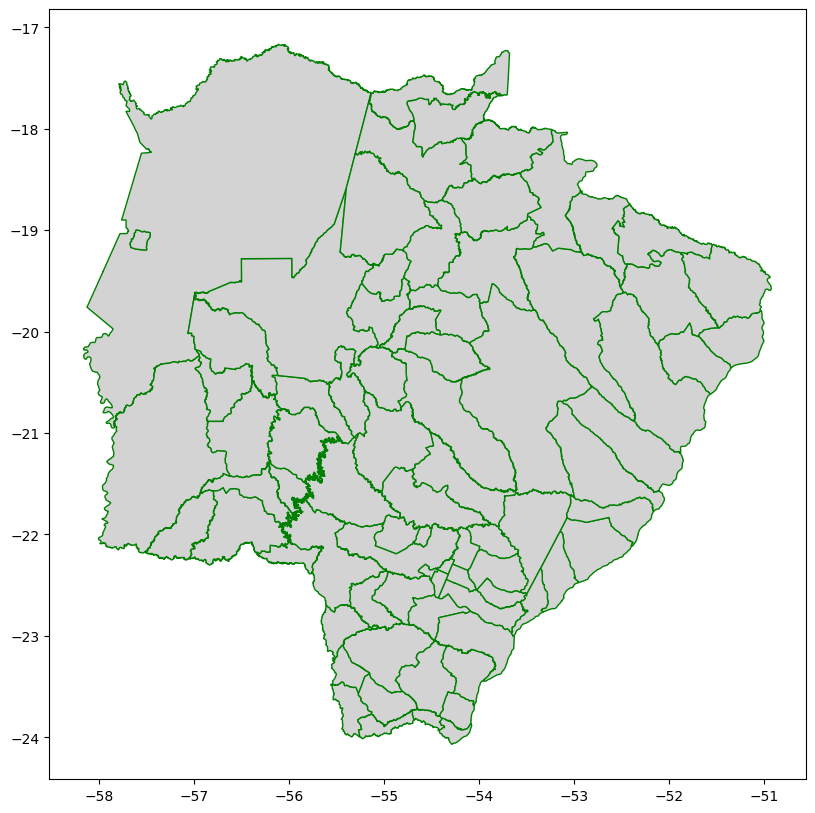

In [271]:
ms.plot(facecolor='lightgray', edgecolor='green',figsize=(15,10))
plt.show()

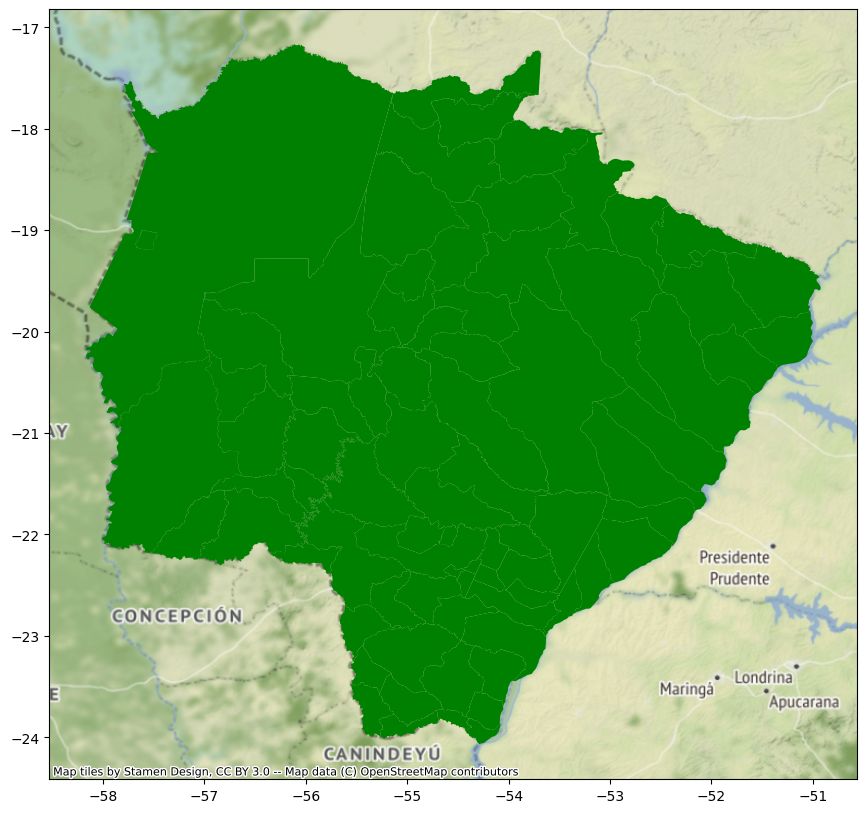

In [272]:
fig, ax = plt.subplots(figsize=(15,10))
ms.plot(ax=ax, color="green")
contextily.add_basemap(ax=ax, crs="EPSG:4674")
plt.show()

In [273]:
def calcula_centroide(geometry):
  return geometry.centroid

In [274]:
ms["centroides"] = ms["geometry"].apply(lambda polygon: calcula_centroide(polygon))

In [275]:
ms.head(100)

,ID,CD_GEOCODM,NM_MUNICIP,geometry,centroides
0,140,5000203,ÁGUA CLARA,"POLYGON ((-53.09300 -20.21272, -53.08960 -20.2...",POINT (-52.99102 -19.78242)
1,141,5000252,ALCINÓPOLIS,"POLYGON ((-53.50659 -18.40831, -53.50794 -18.4...",POINT (-53.74925 -18.20917)
2,142,5000609,AMAMBAI,"POLYGON ((-54.92462 -22.92414, -54.92290 -22.9...",POINT (-54.96774 -23.15780)
3,143,5000708,ANASTÁCIO,"POLYGON ((-55.41798 -20.86286, -55.41794 -20.8...",POINT (-55.76127 -20.70705)
4,144,5000807,ANAURILÂNDIA,"POLYGON ((-52.73613 -21.85311, -52.70559 -21.8...",POINT (-52.80819 -22.11162)
5,145,5000856,ANGÉLICA,"POLYGON ((-53.99320 -22.11721, -53.99956 -22.1...",POINT (-53.86525 -22.06259)
6,146,5000906,ANTÔNIO JOÃO,"POLYGON ((-56.21743 -22.17356, -56.21736 -22.1...",POINT (-55.96925 -22.20573)
7,147,5001003,APARECIDA DO TABOADO,"POLYGON ((-51.11639 -19.82113, -51.11518 -19.8...",POINT (-51.29061 -20.07611)
8,148,5001102,AQUIDAUANA,"POLYGON ((-55.97111 -19.46523, -55.96244 -19.4...",POINT (-55.86331 -19.75572)
9,149,5001243,ARAL MOREIRA,"POLYGON ((-55.51958 -22.72906, -55.52060 -22.7...",POINT (-55.45011 -22.90749)


In [276]:
# fig, ax = plt.subplots(figsize=(15,10))
# ms.plot(ax=ax, color="green")
# contextily.add_basemap(ax=ax, crs="EPSG:4674")
# ms["centroides"].plot(ax=ax, color="red")
# plt.show()

# Concatenando Tabelas

In [277]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)
ls_df = [
pd.read_csv('data/ibge/Tabela616 - População economicamente ativa - MUNICIPIOS.csv', sep=',', skiprows=5),             # Done
pd.read_csv('data/ibge/Tabela1384 - Pessoas por classes de rendimento - MUNICIPIOS.csv', sep=',', skiprows=4),        # Done
pd.read_csv('data/ibge/Tabela1394 - Domicílios por condição de ocupação - MUNICIPIOS.csv', sep=',', skiprows=6),      # Done
pd.read_csv('data/ibge/Tabela1394 - Domicílios por número de banheiros - MUNICIPIOS.csv', sep=',', skiprows=5),     # Done
pd.read_csv('data/ibge/Tabela1552 - Residentes com 65 anos ou mais - MUNICIPIOS.csv', sep=';', skiprows=7),        # Unnamed columns
pd.read_csv('data/ibge/Tabela1552 - Residentes menores de 18 anos - MUNICIPIOS.csv', sep=';', skiprows=7),         # Unnamed columns
pd.read_csv('data/ibge/Tabela2009 - Domicílios por número de dormitórios - MUNICIPIOS.csv', sep=',', skiprows=4),     # Done
pd.read_csv('data/ibge/Tabela2031 - Pessoas por posição na ocupação e categoria do emprego no trabalho principal - MUNICIPIOS.csv', sep=',', skiprows=4), #Done
pd.read_csv('data/ibge/Tabela3219 - Domicílios por número de moradores - MUNICIPIOS.csv', sep=',', skiprows=5),       # Done
pd.read_csv('data/ibge/Tabela3219 - Domicílios por tipo - MUNICIPIOS.csv', sep=',', skiprows=6),                 # Done
pd.read_csv('data/ibge/Tabela3277 - Pessoas por classes de rendimentos - MUNICIPIOS CENTRO OESTE.csv', sep=',', skiprows=4), #Done
pd.read_csv('data/ibge/Tabela3573 - Pessoas desocupadas.csv', sep=',', skiprows=6),
pd.read_csv('data/ibge/Tabela3603 - Pessoas ocupadas por local do trabalho principal.csv', sep=',', skiprows=5),
 pd.read_csv('data/ibge/Tabela3604 - Pessoas ocupadas por tempo de deslocamento para trabalho.csv', sep=',', skiprows=5),
]

ls_names = ['arquivo_616',
'arquivo_1384',
'arquivo_1394',
'arquivo_1394_b',
'arquivo_1552_65',
'arquivo_1552_18',
'arquivo_2009',
'arquivo_2031',
'arquivo_3219',
'arquivo_3219_tipo',
'arquivo_3277',
'arquivo_3573',
'arquivo_3603',
'arquivo_3604']





## Remover cidades nao interessantes:

In [278]:
for i, df in enumerate(ls_df):
    ls_df[i] = pd.merge(df, ms['CD_GEOCODM'], left_on='Cód.', right_on='CD_GEOCODM', how='inner').drop(columns=['CD_GEOCODM'])

## Tratamentos especiais:


In [279]:
ls_df[3].drop(axis=0, index=0, inplace=True) 
ls_df[8].drop(axis=0, index=0, inplace=True) 

In [280]:
ls_df[2].columns

Index(['Cód.', 'Município', 'Condição de ocupação do domicílio',
       'Tipo de esgotamento sanitário', 'Total'],
      dtype='object')

In [281]:
ls_df[2].duplicated().sum()

0

In [282]:
ls_df[6] = ls_df[6].pivot(index=['Cód.', 'Município'], columns='Número de dormitórios', values='Total')
ls_df[2] = ls_df[2].pivot(index=['Cód.', 'Município'], columns='Condição de ocupação do domicílio', values='Total')


In [283]:
ls_df[10]

,Cód.,Município,Sexo,Grupo de idade,Total,Até 1/4 de salário mínimo,Mais de 1/4 a 1/2 salário mínimo,Mais de 1/2 a 1 salário mínimo,Mais de 1 a 2 salários mínimos,Mais de 2 a 3 salários mínimos,Mais de 3 a 5 salários mínimos,Mais de 5 a 10 salários mínimos,Mais de 10 a 15 salários mínimos,Mais de 15 a 20 salários mínimos,Mais de 20 a 30 salários mínimos,Mais de 30 salários mínimos,Sem rendimento,Sem declaração
0,5000203,Água Clara (MS),Total,10 a 14 anos,1426,86,42,24,8,-,2,-,-,-,-,-,1264,-
1,5000203,Água Clara (MS),Total,15 a 19 anos,1299,35,49,219,191,8,3,-,-,-,-,-,794,-
2,5000203,Água Clara (MS),Total,15 a 17 anos,804,32,35,96,74,3,1,-,-,-,-,-,563,-
3,5000203,Água Clara (MS),Total,18 ou 19 anos,495,3,14,123,117,5,2,-,-,-,-,-,231,-
4,5000203,Água Clara (MS),Total,20 a 24 anos,1422,12,22,257,554,77,21,10,-,-,-,-,469,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,5008404,Vicentina (MS),Total,45 a 49 anos,464,20,32,123,110,29,21,16,3,2,-,-,108,-
1088,5008404,Vicentina (MS),Total,50 a 54 anos,376,10,17,100,88,17,21,20,5,2,-,-,96,-
1089,5008404,Vicentina (MS),Total,55 a 59 anos,299,5,13,119,72,9,16,16,3,1,-,-,45,-
1090,5008404,Vicentina (MS),Total,60 a 69 anos,435,-,3,261,106,11,23,9,2,-,1,-,19,-


In [284]:
# Lidando com tabela de idade, renda
cols = ls_df[10].columns[3:]
temp = ls_df[10][cols].set_index('Grupo de idade', append=True).unstack().sort_index(axis=1)
temp.columns = temp.columns.map(lambda x: f'{x[0]}_{x[1]}')

In [285]:
temp
temp2 = ls_df[10].drop(cols, axis=1).join(temp)
temp2.drop(columns=['Sexo'], inplace=True)
ls_df[10] = temp2.groupby(['Cód.', 'Município']).sum().reset_index()

In [286]:
ls_df[10]

,Cód.,Município,Até 1/4 de salário mínimo_10 a 14 anos,Até 1/4 de salário mínimo_15 a 17 anos,Até 1/4 de salário mínimo_15 a 19 anos,Até 1/4 de salário mínimo_18 ou 19 anos,Até 1/4 de salário mínimo_20 a 24 anos,Até 1/4 de salário mínimo_25 a 29 anos,Até 1/4 de salário mínimo_30 a 34 anos,Até 1/4 de salário mínimo_35 a 39 anos,Até 1/4 de salário mínimo_40 a 44 anos,Até 1/4 de salário mínimo_45 a 49 anos,Até 1/4 de salário mínimo_50 a 54 anos,Até 1/4 de salário mínimo_55 a 59 anos,Até 1/4 de salário mínimo_60 a 69 anos,Até 1/4 de salário mínimo_70 anos ou mais,Mais de 1 a 2 salários mínimos_10 a 14 anos,Mais de 1 a 2 salários mínimos_15 a 17 anos,Mais de 1 a 2 salários mínimos_15 a 19 anos,Mais de 1 a 2 salários mínimos_18 ou 19 anos,Mais de 1 a 2 salários mínimos_20 a 24 anos,Mais de 1 a 2 salários mínimos_25 a 29 anos,Mais de 1 a 2 salários mínimos_30 a 34 anos,Mais de 1 a 2 salários mínimos_35 a 39 anos,Mais de 1 a 2 salários mínimos_40 a 44 anos,Mais de 1 a 2 salários mínimos_45 a 49 anos,Mais de 1 a 2 salários mínimos_50 a 54 anos,Mais de 1 a 2 salários mínimos_55 a 59 anos,Mais de 1 a 2 salários mínimos_60 a 69 anos,Mais de 1 a 2 salários mínimos_70 anos ou mais,Mais de 1/2 a 1 salário mínimo_10 a 14 anos,Mais de 1/2 a 1 salário mínimo_15 a 17 anos,Mais de 1/2 a 1 salário mínimo_15 a 19 anos,Mais de 1/2 a 1 salário mínimo_18 ou 19 anos,Mais de 1/2 a 1 salário mínimo_20 a 24 anos,Mais de 1/2 a 1 salário mínimo_25 a 29 anos,Mais de 1/2 a 1 salário mínimo_30 a 34 anos,Mais de 1/2 a 1 salário mínimo_35 a 39 anos,Mais de 1/2 a 1 salário mínimo_40 a 44 anos,Mais de 1/2 a 1 salário mínimo_45 a 49 anos,Mais de 1/2 a 1 salário mínimo_50 a 54 anos,Mais de 1/2 a 1 salário mínimo_55 a 59 anos,Mais de 1/2 a 1 salário mínimo_60 a 69 anos,Mais de 1/2 a 1 salário mínimo_70 anos ou mais,Mais de 1/4 a 1/2 salário mínimo_10 a 14 anos,Mais de 1/4 a 1/2 salário mínimo_15 a 17 anos,Mais de 1/4 a 1/2 salário mínimo_15 a 19 anos,Mais de 1/4 a 1/2 salário mínimo_18 ou 19 anos,Mais de 1/4 a 1/2 salário mínimo_20 a 24 anos,Mais de 1/4 a 1/2 salário mínimo_25 a 29 anos,Mais de 1/4 a 1/2 salário mínimo_30 a 34 anos,Mais de 1/4 a 1/2 salário mínimo_35 a 39 anos,Mais de 1/4 a 1/2 salário mínimo_40 a 44 anos,Mais de 1/4 a 1/2 salário mínimo_45 a 49 anos,Mais de 1/4 a 1/2 salário mínimo_50 a 54 anos,Mais de 1/4 a 1/2 salário mínimo_55 a 59 anos,Mais de 1/4 a 1/2 salário mínimo_60 a 69 anos,Mais de 1/4 a 1/2 salário mínimo_70 anos ou mais,Mais de 10 a 15 salários mínimos_10 a 14 anos,Mais de 10 a 15 salários mínimos_15 a 17 anos,Mais de 10 a 15 salários mínimos_15 a 19 anos,Mais de 10 a 15 salários mínimos_18 ou 19 anos,Mais de 10 a 15 salários mínimos_20 a 24 anos,Mais de 10 a 15 salários mínimos_25 a 29 anos,Mais de 10 a 15 salários mínimos_30 a 34 anos,Mais de 10 a 15 salários mínimos_35 a 39 anos,Mais de 10 a 15 salários mínimos_40 a 44 anos,Mais de 10 a 15 salários mínimos_45 a 49 anos,Mais de 10 a 15 salários mínimos_50 a 54 anos,Mais de 10 a 15 salários mínimos_55 a 59 anos,Mais de 10 a 15 salários mínimos_60 a 69 anos,Mais de 10 a 15 salários mínimos_70 anos ou mais,Mais de 15 a 20 salários mínimos_10 a 14 anos,Mais de 15 a 20 salários mínimos_15 a 17 anos,Mais de 15 a 20 salários mínimos_15 a 19 anos,Mais de 15 a 20 salários mínimos_18 ou 19 anos,Mais de 15 a 20 salários mínimos_20 a 24 anos,Mais de 15 a 20 salários mínimos_25 a 29 anos,Mais de 15 a 20 salários mínimos_30 a 34 anos,Mais de 15 a 20 salários mínimos_35 a 39 anos,Mais de 15 a 20 salários mínimos_40 a 44 anos,Mais de 15 a 20 salários mínimos_45 a 49 anos,Mais de 15 a 20 salários mínimos_50 a 54 anos,Mais de 15 a 20 salários mínimos_55 a 59 anos,Mais de 15 a 20 salários mínimos_60 a 69 anos,Mais de 15 a 20 salários mínimos_70 anos ou mais,Mais de 2 a 3 salários mínimos_10 a 14 anos,Mais de 2 a 3 salários mínimos_15 a 17 anos,Mais de 2 a 3 salários mínimos_15 a 19 anos,Mais de 2 a 3 salários mínimos_18 ou 19 anos,Mais de 2 a 3 salários mínimos_20 a 24 anos,Mais de 2 a 3 salários mínimo

## Renomeando colunas

In [287]:
for i, df in enumerate(ls_df):
    df.name = ls_names[i]

In [288]:
def rename_columns(df):
    num_table = df.name.split('_')[1]
    columns = [f'[{num_table}]{col}' for col in df.columns[2:]]
    columns.insert(0, 'Municípios')
    columns.insert(0, 'Cod Mun')
    df.columns = columns
    return df

In [289]:
for df in ls_df:
    df = rename_columns(df)


In [290]:
# Print shape of list of dataframes
for i in range(len(ls_df)):
    print(ls_df[i].shape)

(78, 5)
(78, 12)
(78, 5)
(77, 11)
(78, 3)
(78, 3)
(78, 7)
(78, 10)
(77, 19)
(78, 10)
(78, 198)
(78, 5)
(78, 10)
(78, 8)


In [291]:
# Checa quantos valores nulos tem em cada dataframe
for i, df in enumerate(ls_df):
    print()
    print(ls_names[i])
    print(df.isna().sum())


arquivo_616
Cod Mun                       0
Municípios                    0
[616]Situação do domicílio    0
[616]Grupo de idade           0
[616]Total                    0
dtype: int64

arquivo_1384
Cod Mun                                   0
Municípios                                0
[1384]Total                               0
[1384]Até 1/2 salário mínimo              0
[1384]Mais de 1/2 a 1 salário mínimo      0
[1384]Mais de 1 a 2 salários mínimos      0
[1384]Mais de 2 a 5 salários mínimos      0
[1384]Mais de 5 a 10 salários mínimos     0
[1384]Mais de 10 a 20 salários mínimos    0
[1384]Mais de 20 salários mínimos         0
[1384]Sem rendimento                      0
[1384]Sem declaração                      0
dtype: int64

arquivo_1394
Cod Mun                 0
Municípios              0
[1394]Outra condição    0
[1394]Próprio           0
[1394]Total             0
dtype: int64

arquivo_1394_b
Cod Mun                                                                      0
Municíp

## Tudo em um dataframe

In [292]:
# Merge list of dataframes
total_df = ls_df[0]
for i in range(1, len(ls_df)):
    total_df = total_df.merge(ls_df[i].loc[:, ls_df[i].columns != 'Municípios'], on="Cod Mun", how="left")

total_df.head()



total_df.columns

total_df.isna().sum()



Cod Mun                       0
Municípios                    0
[616]Situação do domicílio    0
[616]Grupo de idade           0
[616]Total                    0
                             ..
[3604]Total                   0
[3604]Total.1                 0
[3604]Total.2                 0
[3604]Total.3                 0
[3604]Total.4                 0
Length: 280, dtype: int64

In [293]:
total_df.shape

(78, 280)

In [294]:
ls_df[0].head(100)

,Cod Mun,Municípios,[616]Situação do domicílio,[616]Grupo de idade,[616]Total
0,5000203,Água Clara (MS),Total,Total,7484.0
1,5000252,Alcinópolis (MS),Total,Total,2485.0
2,5000609,Amambai (MS),Total,Total,15845.0
3,5000708,Anastácio (MS),Total,Total,11555.0
4,5000807,Anaurilândia (MS),Total,Total,3879.0
5,5000856,Angélica (MS),Total,Total,4740.0
6,5000906,Antônio João (MS),Total,Total,3690.0
7,5001003,Aparecida do Taboado (MS),Total,Total,11567.0
8,5001102,Aquidauana (MS),Total,Total,19864.0
9,5001243,Aral Moreira (MS),Total,Total,4447.0


## Renomeando colunas: